# Child Opportunity Index and Segregation
In this notebook we use the Child Opportunity Index from the 
* [DiversityDataKids project ](https://www.diversitydatakids.org/)

to show how to join tables and to aggregate values in a table
using a very interesting data set.

You can get a sense of what they are doing by looking at this webapp
which allows you to explore different US neighborhoods
to see the levels of opportunity for kids in the neighborhood.
* [Diversitydatakids app ](https://www.diversitydatakids.org/maps/#/explorer/25021400900/15/10,15//xc/m/1.0.14/42.317/-71.115/12.26/)

The data is in the DiversityDataKids folder inside the data folder

For this notebook we want to look at the relationship between the level of segregation in a neighborhood and the child opportunity index.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Reading in the data!
We use the read_csv function to create our data frames

In [2]:
coi_df = pd.read_csv('data/DiversityDataKids/childOpportunity/index.csv')
coi_df

,geoid,year,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,z_ED_nat,...,r_SE_stt,r_COI_stt,c5_ED_met,c5_HE_met,c5_SE_met,c5_COI_met,r_ED_met,r_HE_met,r_SE_met,r_COI_met
0,1001020100,2010,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,424,0.001198,...,67,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001020100,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,414,0.008932,...,83,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001020200,2010,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,497,0.013306,...,31,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001020200,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,508,-0.003518,...,26,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001020300,2010,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,878,-0.014533,...,77,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144403,56043000302,2015,NaN,NaN,NaN,56043,56,WY,706,0.023999,...,33,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144404,56045951100,2010,NaN,NaN,NaN,56045,56,WY,638,-0.028395,...,7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144405,56045951100,2015,NaN,NaN,NaN,56045,56,WY,577,-0.009124,...,8,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144406,56045951300,2010,NaN,NaN,NaN,56045,56,WY,954,-0.004055,...,22,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Take a subset of the data
and let's restrict it to just the 2015 data, not the 2010

In [3]:
coi_df = coi_df[ coi_df['year']==2015]
coi_df = coi_df.copy()  # we want to throw away the 2010 data
coi_df

,geoid,year,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,z_ED_nat,...,r_SE_stt,r_COI_stt,c5_ED_met,c5_HE_met,c5_SE_met,c5_COI_met,r_ED_met,r_HE_met,r_SE_met,r_COI_met
1,1001020100,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,414,0.008932,...,83,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001020200,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,508,-0.003518,...,26,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1001020300,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,804,-0.024829,...,60,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1001020400,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,968,-0.006424,...,79,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1001020500,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,2528,0.010688,...,88,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144399,56043000200,2015,NaN,NaN,NaN,56043,56,WY,667,0.002666,...,40,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144401,56043000301,2015,NaN,NaN,NaN,56043,56,WY,657,0.012065,...,33,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144403,56043000302,2015,NaN,NaN,NaN,56043,56,WY,706,0.023999,...,33,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144405,56045951100,2015,NaN,NaN,NaN,56045,56,WY,577,-0.009124,...,8,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Load in Diversity Data
Let's also load in data on the diversity of neighborhoods and restrict to the 2013-2017 data, ignoring the 2008-2012 data

In [4]:
div_df = pd.read_csv('data/DiversityDataKids/demographics/01001_3_P_140_5.csv')
div_df

,geoid,name,year,aian_est,aian_se,api_est,api_se,asian_est,asian_se,black_est,...,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
0,14000US01001020100,"Census Tract 201, Autauga County, Alabama",2008-2012,0.0,1.720479,0.000000,1.720479,0.000000,1.720479,13.207547,...,13.207547,20.672415,0.000000,1.720479,0.000000,1.720479,0.000000,1.720479,86.792450,5.257348
1,14000US01001020100,"Census Tract 201, Autauga County, Alabama",2013-2017,0.0,1.615201,3.381642,2.420207,3.381642,2.420207,4.589372,...,15.700483,19.601267,0.000000,1.615201,4.830918,3.389575,4.830918,3.389575,87.198067,4.675601
2,14000US01001020200,"Census Tract 202, Autauga County, Alabama",2008-2012,0.0,1.467773,6.639839,3.551034,6.639839,3.551034,46.076458,...,57.545273,14.879006,0.000000,1.467773,4.828974,4.033463,4.828974,4.033463,42.454727,4.707581
3,14000US01001020200,"Census Tract 202, Autauga County, Alabama",2013-2017,0.0,1.316325,1.968504,1.864003,1.968504,1.864003,45.078739,...,50.590549,17.907820,1.377953,1.936521,3.543307,2.309198,2.165354,1.858862,49.409451,9.393344
4,14000US01001020300,"Census Tract 203, Autauga County, Alabama",2008-2012,0.0,0.830847,1.708428,1.970122,1.708428,1.970122,22.095671,...,26.765377,16.926208,0.000000,0.830847,0.000000,0.830847,0.000000,0.830847,76.195900,5.816336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146107,14000US56043000302,"Census Tract 3.02, Washakie County, Wyoming",2013-2017,0.0,1.033262,0.000000,1.033262,0.000000,1.033262,0.000000,...,25.354109,12.898554,9.915014,3.969937,9.915014,3.969937,0.000000,1.033262,90.084991,3.017513
146108,14000US56045951100,"Census Tract 9511, Weston County, Wyoming",2008-2012,0.0,1.143391,0.000000,1.143391,0.000000,1.143391,0.000000,...,1.724138,15.024548,0.313480,1.178107,0.313480,1.178107,0.000000,1.143391,99.686523,0.681932
146109,14000US56045951100,"Census Tract 9511, Weston County, Wyoming",2013-2017,0.0,1.264269,2.253033,2.435257,2.253033,2.435257,0.000000,...,6.239168,20.367887,0.000000,1.264269,3.986135,3.261933,3.986135,3.261933,93.760834,4.062153
146110,14000US56045951300,"Census Tract 9513, Weston County, Wyoming",2008-2012,0.0,0.764657,2.410902,1.740727,2.410902,1.740727,0.000000,...,20.125786,11.637415,5.870021,1.178979,17.714886,3.602431,11.844864,3.635330,79.874214,3.945384


In [ ]:
div_df.columns

In [5]:
div_df = div_df[ div_df['year']=='2013-2017']
div_df = div_df.copy()  # we want to throw away the earlier year data
div_df

,geoid,name,year,aian_est,aian_se,api_est,api_se,asian_est,asian_se,black_est,...,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
1,14000US01001020100,"Census Tract 201, Autauga County, Alabama",2013-2017,0.000000,1.615201,3.381642,2.420207,3.381642,2.420207,4.589372,...,15.700483,19.601267,0.000000,1.615201,4.830918,3.389575,4.830918,3.389575,87.198067,4.675601
3,14000US01001020200,"Census Tract 202, Autauga County, Alabama",2013-2017,0.000000,1.316325,1.968504,1.864003,1.968504,1.864003,45.078739,...,50.590549,17.907820,1.377953,1.936521,3.543307,2.309198,2.165354,1.858862,49.409451,9.393344
5,14000US01001020300,"Census Tract 203, Autauga County, Alabama",2013-2017,0.000000,0.831708,0.995025,1.221990,0.995025,1.221990,18.407961,...,37.064678,17.703751,14.676617,7.543221,17.661692,7.653021,2.985075,2.069049,62.935322,6.124811
7,14000US01001020400,"Census Tract 204, Autauga County, Alabama",2013-2017,0.826446,1.112295,0.000000,0.690799,0.000000,0.690799,4.235538,...,23.966942,17.726776,12.086777,6.622758,18.904959,6.962380,6.818182,2.868102,76.033058,4.999868
9,14000US01001020500,"Census Tract 205, Autauga County, Alabama",2013-2017,0.000000,0.384749,2.768987,1.218844,2.768987,1.218844,20.727848,...,28.599682,13.299748,0.000000,0.384749,5.102848,2.358436,5.102848,2.358436,71.400314,5.427132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146103,14000US56043000200,"Census Tract 2, Washakie County, Wyoming",2013-2017,0.299850,1.141473,0.000000,1.093678,0.000000,1.093678,3.748126,...,31.934032,14.081539,11.694153,4.143226,20.839581,5.057827,9.145428,3.515352,75.112442,4.910016
146105,14000US56043000301,"Census Tract 3.01, Washakie County, Wyoming",2013-2017,0.000000,1.110325,0.000000,1.110325,0.000000,1.110325,0.000000,...,22.831049,15.115695,6.088280,3.571495,11.263318,5.250284,5.175038,4.111278,88.736687,2.972861
146107,14000US56043000302,"Census Tract 3.02, Washakie County, Wyoming",2013-2017,0.000000,1.033262,0.000000,1.033262,0.000000,1.033262,0.000000,...,25.354109,12.898554,9.915014,3.969937,9.915014,3.969937,0.000000,1.033262,90.084991,3.017513
146109,14000US56045951100,"Census Tract 9511, Weston County, Wyoming",2013-2017,0.000000,1.264269,2.253033,2.435257,2.253033,2.435257,0.000000,...,6.239168,20.367887,0.000000,1.264269,3.986135,3.261933,3.986135,3.261933,93.760834,4.062153


# Data Cleaning
We would like to combine these two tables using the geocode fields. We have already removed to older data from each dataset.

The challenge is that you can see that the geocode for the COI and the DIV frames are slightly different. 

The DIV have 7 additional characters at the beginning " 14000US". 

The geocode uniquely identifies the neighborhood, so we can use it to combine the two tables where each row would correspond to one neighborhood but we first have to get the geocodes in the same form.

Let's first change the geoid field of the div_df dataframe to remove the first 7 characters.

We'll do it in two steps. First creating a new column of data (z) and then assigning that column of data to the 'geoid' column of div_df


In [7]:
z = div_df['geoid'].apply(lambda x: int(x[7:]))
z

1          1001020100
3          1001020200
5          1001020300
7          1001020400
9          1001020500
             ...     
146103    56043000200
146105    56043000301
146107    56043000302
146109    56045951100
146111    56045951300
Name: geoid, Length: 73056, dtype: int64

In [8]:

div_df['geoid'] = z
div_df


,geoid,name,year,aian_est,aian_se,api_est,api_se,asian_est,asian_se,black_est,...,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
1,1001020100,"Census Tract 201, Autauga County, Alabama",2013-2017,0.000000,1.615201,3.381642,2.420207,3.381642,2.420207,4.589372,...,15.700483,19.601267,0.000000,1.615201,4.830918,3.389575,4.830918,3.389575,87.198067,4.675601
3,1001020200,"Census Tract 202, Autauga County, Alabama",2013-2017,0.000000,1.316325,1.968504,1.864003,1.968504,1.864003,45.078739,...,50.590549,17.907820,1.377953,1.936521,3.543307,2.309198,2.165354,1.858862,49.409451,9.393344
5,1001020300,"Census Tract 203, Autauga County, Alabama",2013-2017,0.000000,0.831708,0.995025,1.221990,0.995025,1.221990,18.407961,...,37.064678,17.703751,14.676617,7.543221,17.661692,7.653021,2.985075,2.069049,62.935322,6.124811
7,1001020400,"Census Tract 204, Autauga County, Alabama",2013-2017,0.826446,1.112295,0.000000,0.690799,0.000000,0.690799,4.235538,...,23.966942,17.726776,12.086777,6.622758,18.904959,6.962380,6.818182,2.868102,76.033058,4.999868
9,1001020500,"Census Tract 205, Autauga County, Alabama",2013-2017,0.000000,0.384749,2.768987,1.218844,2.768987,1.218844,20.727848,...,28.599682,13.299748,0.000000,0.384749,5.102848,2.358436,5.102848,2.358436,71.400314,5.427132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146103,56043000200,"Census Tract 2, Washakie County, Wyoming",2013-2017,0.299850,1.141473,0.000000,1.093678,0.000000,1.093678,3.748126,...,31.934032,14.081539,11.694153,4.143226,20.839581,5.057827,9.145428,3.515352,75.112442,4.910016
146105,56043000301,"Census Tract 3.01, Washakie County, Wyoming",2013-2017,0.000000,1.110325,0.000000,1.110325,0.000000,1.110325,0.000000,...,22.831049,15.115695,6.088280,3.571495,11.263318,5.250284,5.175038,4.111278,88.736687,2.972861
146107,56043000302,"Census Tract 3.02, Washakie County, Wyoming",2013-2017,0.000000,1.033262,0.000000,1.033262,0.000000,1.033262,0.000000,...,25.354109,12.898554,9.915014,3.969937,9.915014,3.969937,0.000000,1.033262,90.084991,3.017513
146109,56045951100,"Census Tract 9511, Weston County, Wyoming",2013-2017,0.000000,1.264269,2.253033,2.435257,2.253033,2.435257,0.000000,...,6.239168,20.367887,0.000000,1.264269,3.986135,3.261933,3.986135,3.261933,93.760834,4.062153


In [9]:
a = set(div_df.geoid.unique())
b = set(coi_df.geoid.unique())
print('get ready')
c = a-b
d = b-a
print(c)
print(d)
print(len(c),len(d))

get ready
{6031001602, 51710980100, 26013990100, 51059980300, 36081010701, 42003980300, 51810990100, 51650990100, 55025991702, 55025991703, 15001991200, 24005980200, 51013980200, 21221980200, 13053020206, 17031835700, 44009990200, 4013113400, 24003990000, 21015980100, 36055980100, 21047980100, 6071980100, 47031980100, 21111980100, 45015980100, 21143980100, 12055980100, 22071980100, 42041981001, 37019990100, 6075990100, 51131990100, 45019990100, 45051990100, 12091990100, 26011990100, 36059990100, 8001988700, 48041980000, 12105980000, 48329980000, 39049980000, 12009980000, 39113980000, 51710980200, 41051980000, 48309000300, 26029990000, 39085990000, 36045990001, 6061990000, 26061990000, 34029990000, 25005990000, 12045990000, 6073006200, 26157990000, 55117990000, 15001991300, 8059980400, 37093980100, 12086014100, 36081064102, 6071980200, 8059980000, 12055980200, 45079011501, 24031703218, 13121003700, 12091990200, 36059990200, 36047040700, 34001990000, 12086980800, 36027640001, 36047096000

# Merging the tables
We can now merge the two tables using the geoid field and get one big table for our analysis!

We use the [merge](https://pandas.pydata.org/docs/user_guide/merging.html) operation

We call this table df

In [11]:
df = pd.merge(coi_df, div_df,on='geoid')
df

,geoid,year_x,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,z_ED_nat,...,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
0,1001020100,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,414,0.008932,...,15.700483,19.601267,0.000000,1.615201,4.830918,3.389575,4.830918,3.389575,87.198067,4.675601
1,1001020200,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,508,-0.003518,...,50.590549,17.907820,1.377953,1.936521,3.543307,2.309198,2.165354,1.858862,49.409451,9.393344
2,1001020300,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,804,-0.024829,...,37.064678,17.703751,14.676617,7.543221,17.661692,7.653021,2.985075,2.069049,62.935322,6.124811
3,1001020400,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,968,-0.006424,...,23.966942,17.726776,12.086777,6.622758,18.904959,6.962380,6.818182,2.868102,76.033058,4.999868
4,1001020500,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,2528,0.010688,...,28.599682,13.299748,0.000000,0.384749,5.102848,2.358436,5.102848,2.358436,71.400314,5.427132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72183,56043000200,2015,NaN,NaN,NaN,56043,56,WY,667,0.002666,...,31.934032,14.081539,11.694153,4.143226,20.839581,5.057827,9.145428,3.515352,75.112442,4.910016
72184,56043000301,2015,NaN,NaN,NaN,56043,56,WY,657,0.012065,...,22.831049,15.115695,6.088280,3.571495,11.263318,5.250284,5.175038,4.111278,88.736687,2.972861
72185,56043000302,2015,NaN,NaN,NaN,56043,56,WY,706,0.023999,...,25.354109,12.898554,9.915014,3.969937,9.915014,3.969937,0.000000,1.033262,90.084991,3.017513
72186,56045951100,2015,NaN,NaN,NaN,56045,56,WY,577,-0.009124,...,6.239168,20.367887,0.000000,1.264269,3.986135,3.261933,3.986135,3.261933,93.760834,4.062153


# check the columns!
We see the columns contain both the COI and DIV columns



In [12]:
df.columns

Index(['geoid', 'year_x', 'in100', 'msaid15', 'msaname15', 'countyfips',
       'statefips', 'stateusps', 'pop', 'z_ED_nat', 'z_HE_nat', 'z_SE_nat',
       'z_COI_nat', 'c5_ED_nat', 'c5_HE_nat', 'c5_SE_nat', 'c5_COI_nat',
       'r_ED_nat', 'r_HE_nat', 'r_SE_nat', 'r_COI_nat', 'c5_ED_stt',
       'c5_HE_stt', 'c5_SE_stt', 'c5_COI_stt', 'r_ED_stt', 'r_HE_stt',
       'r_SE_stt', 'r_COI_stt', 'c5_ED_met', 'c5_HE_met', 'c5_SE_met',
       'c5_COI_met', 'r_ED_met', 'r_HE_met', 'r_SE_met', 'r_COI_met', 'name',
       'year_y', 'aian_est', 'aian_se', 'api_est', 'api_se', 'asian_est',
       'asian_se', 'black_est', 'black_se', 'hisp_est', 'hisp_se', 'nhisp_est',
       'nhisp_se', 'nhopi_est', 'nhopi_se', 'nhwhite_est', 'nhwhite_se',
       'nnhwhite_est', 'nnhwhite_se', 'other_est', 'other_se', 'othermore_est',
       'othermore_se', 'twomore_est', 'twomore_se', 'white_est', 'white_se'],
      dtype='object')

# Missing values
One challenge is that some of the neighborhoods don't have demographic data.

In pandas, missing data is represented by the value np.nan which stands for not a number.
You can check to see if the value is a defined number with np.isfinite(value) which is true if the
number is not infinity and not NaN.

The following query finds all of the rows where either the r_COI_stt or the nhwhite_est fields are undefined.

In [13]:

df[ (~np.isfinite(df['r_COI_stt'])) | (~ np.isfinite(df['nhwhite_est'])) ][['geoid','r_COI_stt','nhwhite_est']]

,geoid,r_COI_stt,nhwhite_est
1454,4013040506,78,NaN
1455,4013040507,23,NaN
1456,4013040512,12,NaN
1466,4013040522,37,NaN
1468,4013040524,52,NaN
...,...,...,...
67759,51135980100,8,NaN
68012,51179010201,3,NaN
70837,55025001603,15,NaN
70842,55025001705,82,NaN


# Restrict to rows that have valid demographic data
To handle this we can create a view of the dataset which only contains those rows where the demographic data is defined.

In [14]:

df2 = df[np.isfinite(df['nhwhite_est'])]
df2




,geoid,year_x,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,z_ED_nat,...,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
0,1001020100,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,414,0.008932,...,15.700483,19.601267,0.000000,1.615201,4.830918,3.389575,4.830918,3.389575,87.198067,4.675601
1,1001020200,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,508,-0.003518,...,50.590549,17.907820,1.377953,1.936521,3.543307,2.309198,2.165354,1.858862,49.409451,9.393344
2,1001020300,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,804,-0.024829,...,37.064678,17.703751,14.676617,7.543221,17.661692,7.653021,2.985075,2.069049,62.935322,6.124811
3,1001020400,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,968,-0.006424,...,23.966942,17.726776,12.086777,6.622758,18.904959,6.962380,6.818182,2.868102,76.033058,4.999868
4,1001020500,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,2528,0.010688,...,28.599682,13.299748,0.000000,0.384749,5.102848,2.358436,5.102848,2.358436,71.400314,5.427132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72183,56043000200,2015,NaN,NaN,NaN,56043,56,WY,667,0.002666,...,31.934032,14.081539,11.694153,4.143226,20.839581,5.057827,9.145428,3.515352,75.112442,4.910016
72184,56043000301,2015,NaN,NaN,NaN,56043,56,WY,657,0.012065,...,22.831049,15.115695,6.088280,3.571495,11.263318,5.250284,5.175038,4.111278,88.736687,2.972861
72185,56043000302,2015,NaN,NaN,NaN,56043,56,WY,706,0.023999,...,25.354109,12.898554,9.915014,3.969937,9.915014,3.969937,0.000000,1.033262,90.084991,3.017513
72186,56045951100,2015,NaN,NaN,NaN,56045,56,WY,577,-0.009124,...,6.239168,20.367887,0.000000,1.264269,3.986135,3.261933,3.986135,3.261933,93.760834,4.062153


(array([8041., 7059., 7179., 7315., 7372., 7489., 7454., 7310., 6637.,
        6176.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

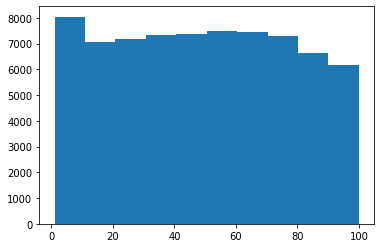

In [27]:
plt.hist(df2['r_COI_nat'],bins=10)

# Look for correlations between Diversity and Child Opportunity
We can create a 2d histogram to look for correlations between the percent of non-hispanic white children in a neighborhood and the child opportunity index

This is to answer the following question.

Do predominatly white neighborhoods have more opportunity for children then neighborhoods that are predominantly non-white?

and if so, how strong is this effect?

'none'

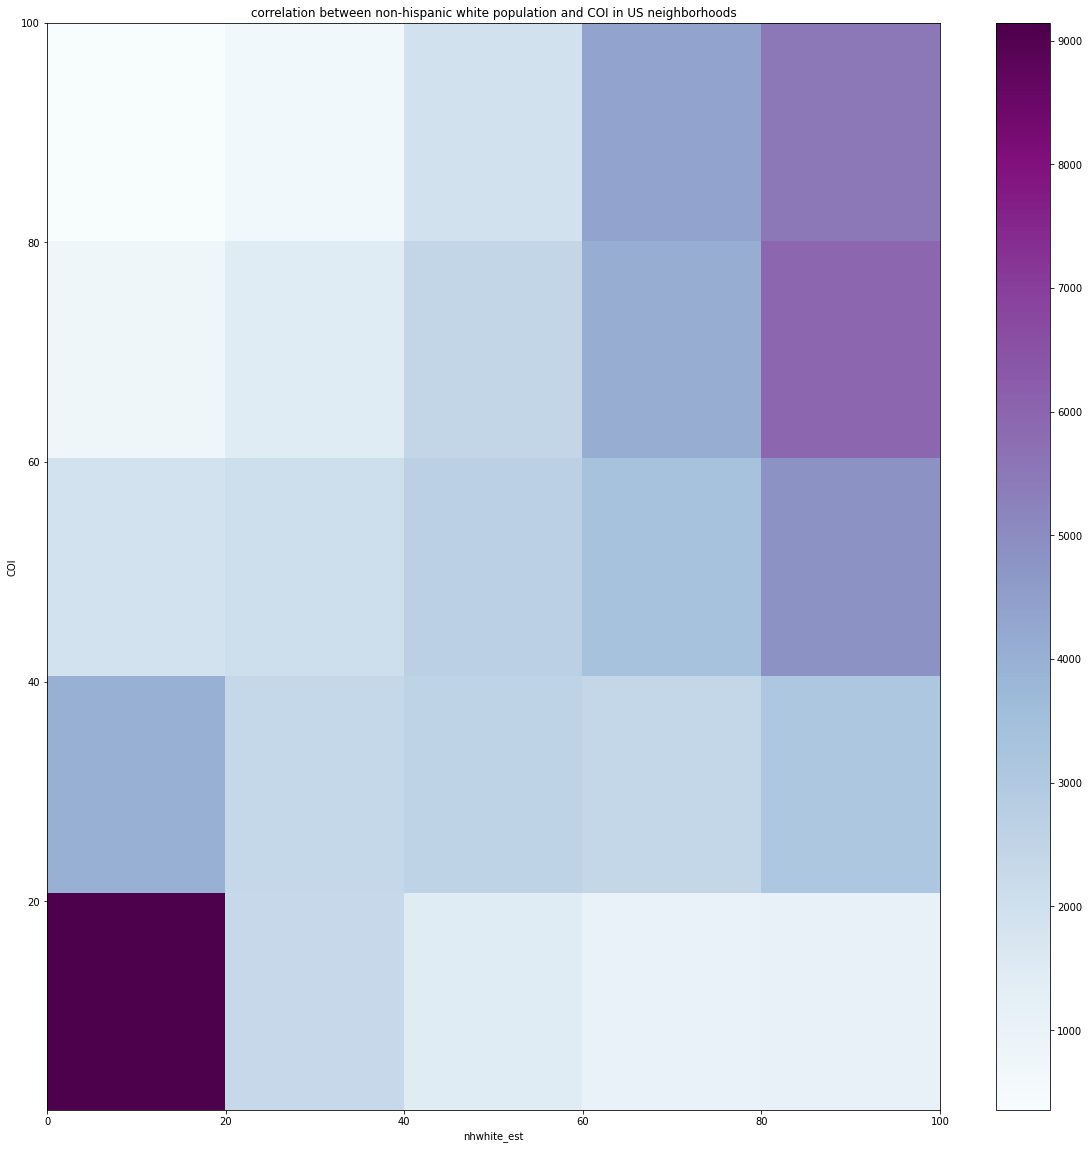

In [22]:
col = 'nhwhite_est'
plt.figure(figsize=(20,20))
#plt.scatter(df2[col],df2['r_COI_nat'])
plt.hist2d(df2[col],df2['r_COI_nat'], bins=(5,5), cmap=plt.cm.BuPu)
plt.ylabel('COI')
plt.xlabel(col)
plt.colorbar()
plt.title("correlation between non-hispanic white population and COI in US neighborhoods")
plt.savefig("images/nhwhite_coi.png")


'none'

# Discussion.
We can see that neighborhoods with a relatively high percentage of non-hispanic white children tend to have fairly high opportunity (the darker squares in the upper right)

In contrast, those neighborhoods where there are fewer that 20% non-hispanic white children have very little opportunity for health growth. (the dark square in the lower left)

We can also look to see how many neighborhoods are at each COI level and how many are at each diversity level with histograms as follows:

In [ ]:

plt.figure()
plt.hist(df2[col],bins=50)
plt.title("number of neighborhoods for each value of "+col)
plt.figure()
plt.hist(df2['r_COI_nat'],bins=50)
plt.title("number of neighborhoods at each COI level")
'done'

# Aggregation using groupby
Next, we will look to see what the average COI is as a function of the percentage of non-hispanic whites in the neighborhood.


To do this we will need to group the data by the Child Opportunity Index (in [0,1,2,..., 100]) 
and then for each bin find the mean and median of the percentage of non-hispanic whites in the neighborhood.

In [ ]:
df2.groupby('r_COI_nat').nhwhite_est.agg(['max', 'min', 'median', 'mean']).plot(figsize=(20,20))
plt.ylabel("percent non-hispanic white",fontsize=24)
plt.xlabel("Child Opportunity Index",fontsize=24)
plt.legend(fontsize=24)
plt.title("Correlation between Segregation and Opportunity",fontsize=24)
plt.grid()
plt.savefig("images/SegVsOpp.png")


# Discussion
Child Opportunity and Segregation are tighly correlated. The higher the opportunity, the more white the neighborhood.

We do the aggregation with the [groupby paradigm](https://pandas.pydata.org/docs/user_guide/groupby.html)


```
DATAFRAME.groupby(COLUMN1).COLUMN2.agg(LIST OF FUNCTIONS FROM ARRAY TO NUMBERS)
```

In [ ]:
def percentile(n):
    ''' returns a function that calculates the nth percentile for an array of numbers'''
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

df2.groupby('r_COI_nat').nhwhite_est.agg([percentile(n) for n in [90,75,50,25,10]]).plot(figsize=(20,20))
plt.ylabel("percent non-hispanic white",fontsize=24)
plt.xlabel("Child Opportunity Index",fontsize=24)
plt.legend(fontsize=24)
plt.title("Correlation between Segregation and Opportunity",fontsize=24)
plt.grid()
plt.savefig("images/SegVsOppPERCENTILES.png")


# Discussion
This shows that there is a linear relationship between the level of segration and the child opportunity, but there is quite a bit of variance. But about 75% of neigborhoods with child opportunity under 5/100 have fewer that 20% non-hispanic whites.

# Box plots for deciles of COI
How we look at creating box plots for deciles of the Child Opportunity Index
First we create a new column for the deciles by integer dividing r_COI_nat by 10
and assigning it to a new column.

In [ ]:
df3 = df2.copy()
zz = df3.apply(lambda row: row['r_COI_nat']//10,axis=1)
zz

df3['COI_decile'] = zz
df3

# Aggregating with groupby then boxplotting
Here we show how you can plot the grouped results using the boxplot function.


In [ ]:
zz = df3.groupby('COI_decile')
zz.boxplot(subplots=False,column='nhwhite_est',figsize=(20,20),sharex=True)
plt.savefig("images/SegVsOpBOX.png")

In [ ]:
help(zz.boxplot)   # help(FUNCTION) will give you info about the function as well FUNCTION?

In [ ]:
df.describe()

In [ ]:
df[df['pop']<800].describe()